# Hitarth Sharma
# **The Spark Foundation GRIPFEB2021**
# **Task-4 : Exploratory Data Analysis - Terrorism**
### 1.Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 
### 2.As a security/defense analyst, try to find out the hot zone of terrorism. 
### 3.What all security issues and insights you can derive by EDA? 




### Importing necessary libraries:

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the dataset:

In [3]:
data=pd.read_csv('C:/Users/user/Documents/GRIP_Tasks/Global Terrorism - START 1data/globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

there are 181691 rows and 135 columns in this dataset

In [5]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

#### Renaming the columns for better understanding:

In [8]:
data=data.rename(columns={'eventid':'Event ID','iyear':'Year','imonth':'Month','iday':'Day',
                     'country_txt':'Country','region_txt':'Region','provstate':'State',
                     'city':'City','latitude':'Latitude','longitude':'Longitude',
                    'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubtype',
                   'natlty1_txt':'Nationality','gname':'GroupName','weaptype1_txt':'WeaponType','nkill':'Killed',
                     'nwound':'Wounded'})
data.head()

,Event ID,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Selecting the necessary columns for data exploration:

In [9]:
data1=data[['Year','Month','Day','Country','Region','State','City','Latitude','Longitude','AttackType','TargetType',
'TargetSubtype','Nationality','GroupName','WeaponType','Killed','Wounded']]
data1.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,AttackType,TargetType,TargetSubtype,Nationality,GroupName,WeaponType,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Incendiary,NaN,NaN


In [10]:
data1.shape

(181691, 17)

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   Region         181691 non-null  object 
 5   State          181270 non-null  object 
 6   City           181257 non-null  object 
 7   Latitude       177135 non-null  float64
 8   Longitude      177134 non-null  float64
 9   AttackType     181691 non-null  object 
 10  TargetType     181691 non-null  object 
 11  TargetSubtype  171318 non-null  object 
 12  Nationality    180132 non-null  object 
 13  GroupName      181691 non-null  object 
 14  WeaponType     181691 non-null  object 
 15  Killed         171378 non-null  float64
 16  Wounded        165380 non-null  float64
dtypes: float64(4), int64(3), obje

In [12]:
data1.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [13]:
data1.corr()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


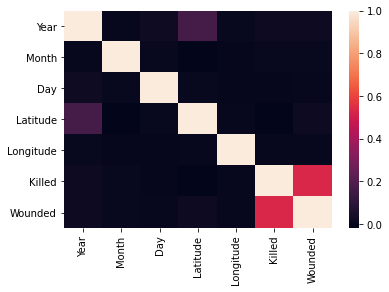

In [14]:
sns.heatmap(data1.corr())
plt.show()

### Now we will check the most affected regions from terrorism:

In [15]:
dr=data1['Region'].value_counts()
print('Region-wise data of terror activities:')
dr

Region-wise data of terror activities:


Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

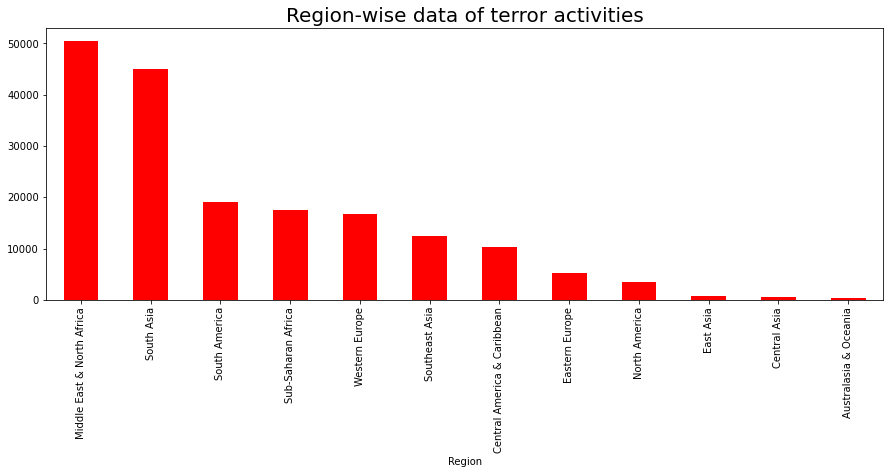

In [16]:
dr.plot(kind='bar',figsize=(15,5),color='r')
plt.title('Region-wise data of terror activities',size=20)
plt.xlabel('Region')
plt.show()

from the above graph, we can see that **Middle East and North Africa** is the most affected region.

### Now we will check the top 10 most affected countries from terrorism:

In [17]:
dc=data1['Country'].value_counts()
print('These are the top 10 most affected countries from terrorism:')
dc10=dc.head(10)
dc10

These are the top 10 most affected countries from terrorism:


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

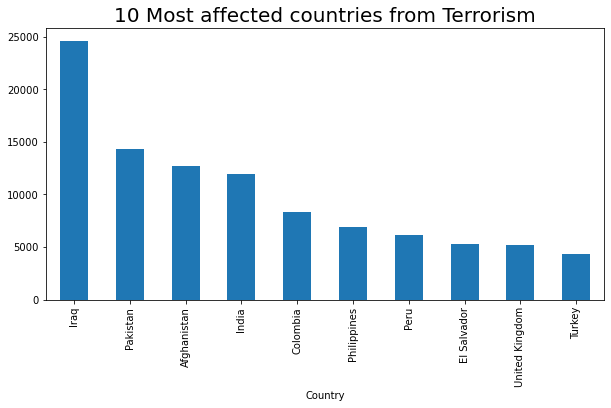

In [18]:
dc10.plot(kind='bar',figsize=(10,5))
plt.title('10 Most affected countries from Terrorism',size=20)
plt.xlabel('Country')
plt.show()

From the above graph we can see that **Iraq** is the most affected country from terrorism.

### Now we will check most affected cities from terrorism in the world:

In [19]:
dct=data1['City'].value_counts()
print('These are the top 10 most affected cities from terrorism in the world:')
dct10=dct.head(10)
dct10

These are the top 10 most affected cities from terrorism in the world:


Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

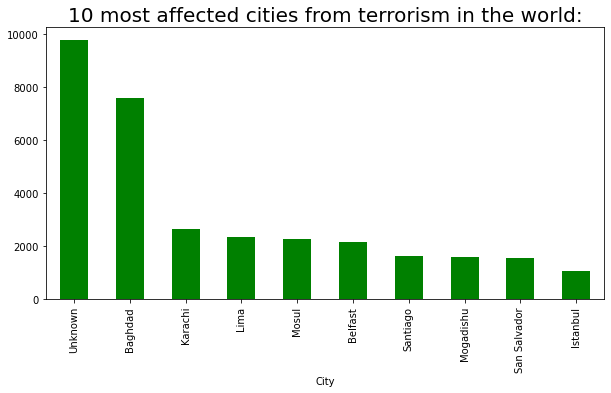

In [20]:
dct10.plot(kind='bar',figsize=(10,5),color='green')
plt.title('10 most affected cities from terrorism in the world:',size=20)
plt.xlabel('City')
plt.show()

Baghdad is the most affected city from terrorism in the world

In [21]:
data['Year'].value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

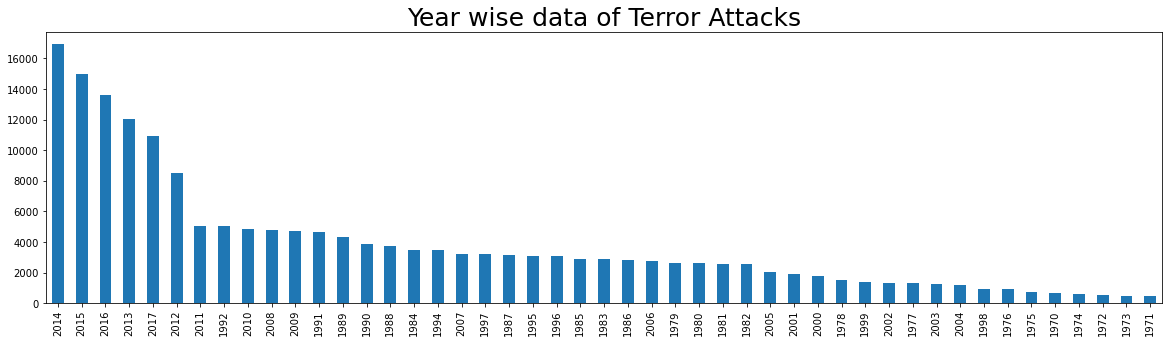

In [22]:
data['Year'].value_counts().plot(kind='bar',figsize=(20,5))
plt.title('Year wise data of Terror Attacks',size=25)
plt.show()

we can see that most terror attacks happened in the year 2014

### Analysis of terror attacks by  terrorist groups:

In [23]:
data1['GroupName'].value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: GroupName, dtype: int64

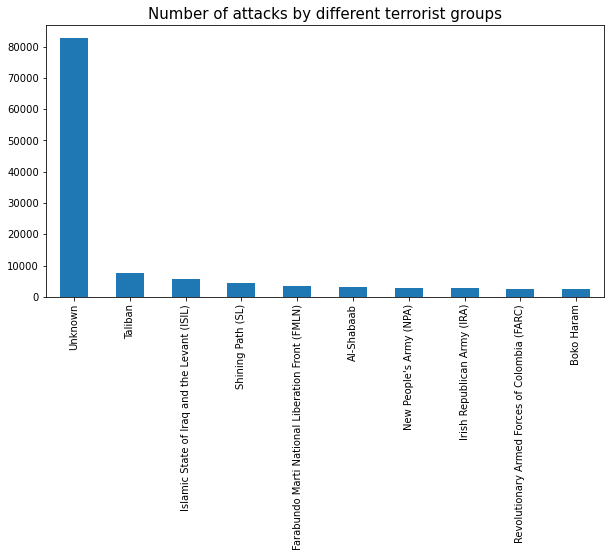

In [24]:
data1['GroupName'].value_counts()[:10].plot(kind='bar',figsize=(10,5))
plt.title('Number of attacks by different terrorist groups',size=15)
plt.show()

Taliban committed the maximum terror attacks.

In [40]:
dtt=data1['TargetType'].value_counts()
print('terror attack on different targets:')
dtt

terror attack on different targets:


Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: TargetType, dtype: int64

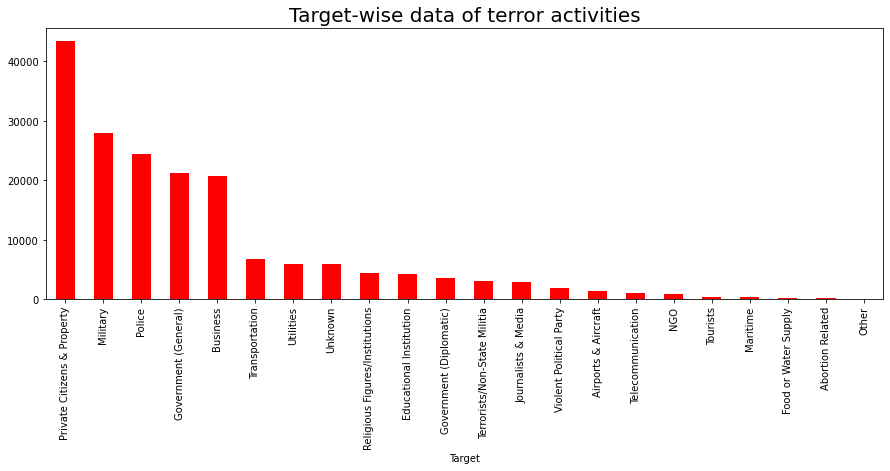

In [42]:
dtt.plot(kind='bar',figsize=(15,5),color='r')
plt.title('Target-wise data of terror activities',size=20)
plt.xlabel('Target')
plt.show()

we can see that in most terror attacks terrorists target Private Citizens and Property.

In [27]:
data2=data1.sort_values(['Killed','Wounded'],ascending=False)[['Year','Country',
'State','Region','City','GroupName','Nationality','Killed','Wounded']]
print('a maximum number of people were killed in these terror attacks:')
data2.head(10)

a maximum number of people were killed in these terror attacks:


,Year,Country,State,Region,City,GroupName,Nationality,Killed,Wounded
133518,2014,Iraq,Saladin,Middle East & North Africa,Tikrit,Islamic State of Iraq and the Levant (ISIL),Iraq,1570.0,NaN
73126,2001,United States,New York,North America,New York City,Al-Qaida,United States,1384.0,8190.0
73127,2001,United States,New York,North America,New York City,Al-Qaida,United States,1383.0,8191.0
55934,1994,Rwanda,Kigali,Sub-Saharan Africa,Gikoro,Hutu extremists,Rwanda,1180.0,0.0
136283,2014,Iraq,Nineveh,Middle East & North Africa,Sinjar,Islamic State of Iraq and the Levant (ISIL),Iraq,953.0,NaN
133225,2014,Iraq,Nineveh,Middle East & North Africa,Badush,Islamic State of Iraq and the Levant (ISIL),Iraq,670.0,0.0
179671,2017,Somalia,Banaadir,Sub-Saharan Africa,Mogadishu,Al-Shabaab,Somalia,588.0,316.0
76347,2004,Nepal,Central,South Asia,Dhading district,Communist Party of Nepal- Maoist (CPN-M),Nepal,518.0,216.0
136746,2014,Syria,Raqqah,Middle East & North Africa,Unknown,Islamic State of Iraq and the Levant (ISIL),Syria,517.0,NaN
170198,2016,Syria,Homs,Middle East & North Africa,Palmyra,Islamic State of Iraq and the Levant (ISIL),Syria,433.0,NaN


### Now we will analyze number of killings in different regions:

In [28]:
data3=data1.groupby('Region').sum().sort_values(['Killed'],ascending=False)[['Killed','Wounded']]
data3

,Killed,Wounded
Region,,
Middle East & North Africa,137642.0,214308.0
South Asia,101319.0,141360.0
Sub-Saharan Africa,78386.0,52857.0
South America,28849.0,16704.0
Central America & Caribbean,28708.0,8991.0
Southeast Asia,15637.0,26259.0
Eastern Europe,7415.0,12045.0
Western Europe,6694.0,18332.0
North America,4916.0,21531.0


The maximum number of people were killed in the Middle East and North Africa region

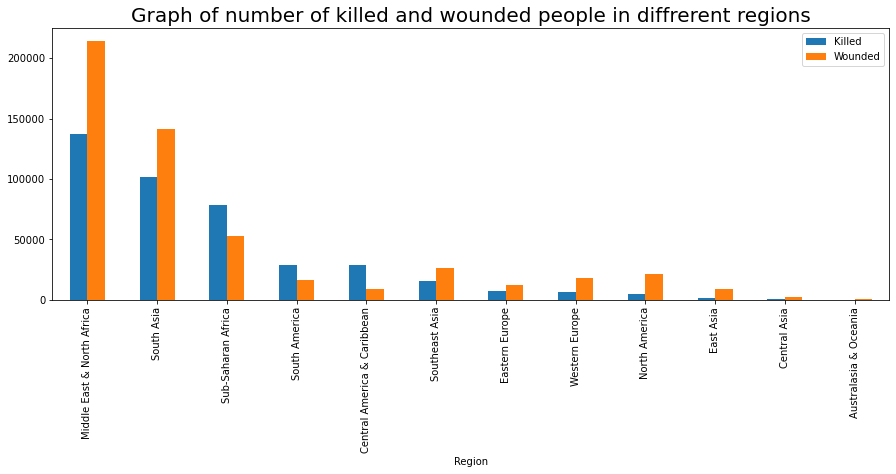

In [29]:
data3.plot(kind='bar',figsize=(15,5))
plt.title('Graph of number of killed and wounded people in diffrerent regions',size=20)
plt.show()

### Now we will analyze number of killings in different countries:

In [30]:
data4=data1.groupby('Country').sum().sort_values(['Killed'],ascending=False)[['Killed','Wounded']]
data4.head(10)

,Killed,Wounded
Country,,
Iraq,78589.0,134690.0
Afghanistan,39384.0,44277.0
Pakistan,23822.0,42038.0
Nigeria,22682.0,10239.0
India,19341.0,28980.0
Sri Lanka,15530.0,15561.0
Syria,15229.0,14109.0
Colombia,14698.0,10328.0
Peru,12771.0,4078.0


Iraq is on top in the maximum number of killings in terror attacks

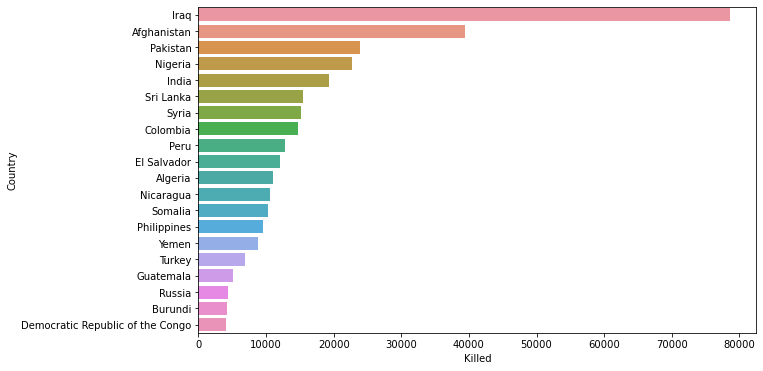

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='Killed',y=data4[0:20].index,data=data4[0:20])
plt.show()

### Analysis of killings by different terrorist groups:

In [32]:
data5=data1.groupby('GroupName').sum().sort_values(['Killed'],ascending=False)[['Killed','Wounded']]
data5.head(10)

,Killed,Wounded
GroupName,,
Unknown,112367.0,210339.0
Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0
Taliban,29410.0,27932.0
Boko Haram,20328.0,9473.0
Shining Path (SL),11601.0,3031.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0,11031.0
Al-Shabaab,9330.0,7624.0
Farabundo Marti National Liberation Front (FMLN),8065.0,4065.0
Nicaraguan Democratic Force (FDN),6662.0,734.0


Islamic State of Iraq and the Levant (ISIL) group committed the maximum killings.

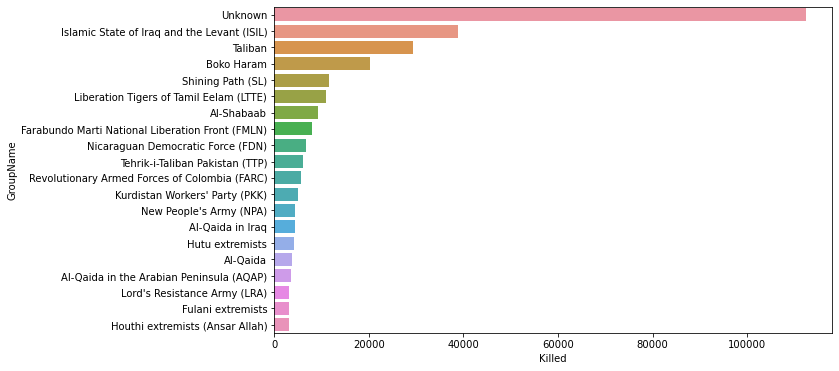

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='Killed',y=data5[0:20].index,data=data5[0:20])
plt.show()

### Analysis of killings based on weapon type:

In [34]:
dw=data1.groupby(['WeaponType']).sum().sort_values('Killed',ascending=False)[['Killed','Wounded']]
dw

,Killed,Wounded
WeaponType,,
Firearms,174894.0,77219.0
Explosives,174277.0,385904.0
Unknown,42620.0,17575.0
Melee,10575.0,5495.0
Incendiary,5476.0,5530.0
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",3184.0,17121.0
Chemical,624.0,13825.0
Other,123.0,105.0
Sabotage Equipment,83.0,286.0


We can see that maximum killings were committed using Firearms and Explosives

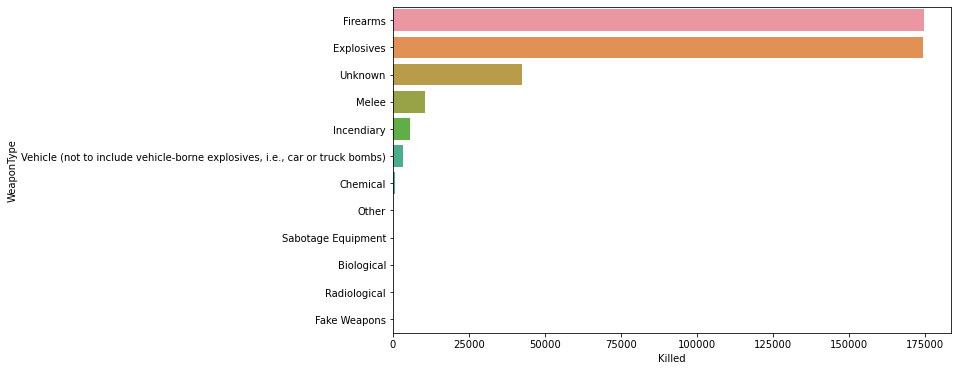

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='Killed',y=dw.index,data=dw)
plt.show()

### Analysis of killings based on attack type:

In [38]:
da=data1.groupby(['AttackType']).sum().sort_values('Killed',ascending=False)[['Killed','Wounded']]
da

,Killed,Wounded
AttackType,,
Armed Assault,160297.0,77366.0
Bombing/Explosion,157321.0,372686.0
Unknown,32381.0,14725.0
Assassination,24920.0,13887.0
Hostage Taking (Kidnapping),24231.0,6446.0
Hostage Taking (Barricade Incident),4478.0,3966.0
Hijacking,3718.0,17001.0
Facility/Infrastructure Attack,3642.0,3765.0
Unarmed Assault,880.0,14027.0


Maximum people were killed by Armed Assault

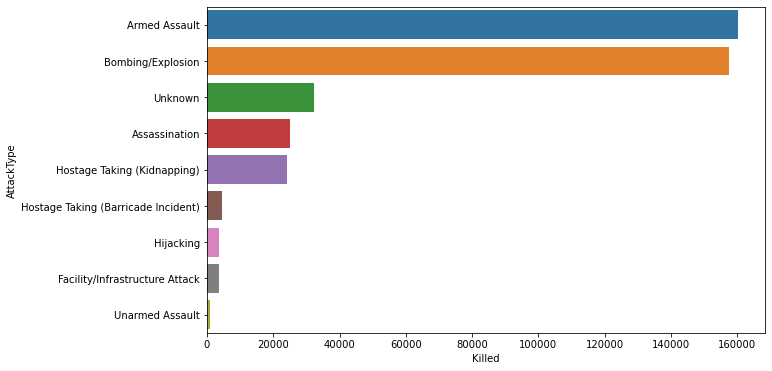

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='Killed',y=da.index,data=da)
plt.show()

# Conclusion:

- **Middle East and North Africa** region is the hot zone of terrorism.
- In countries, **Iraq** is the hot zone of terrorism.
- In cities, **Baghdad** is the hot zone of terrorism.
- Maximum terror attacks happened in the year **2014**.
- **Taliban** committed the maximum terror attacks.
- In most terror attacks terrorists target Private Citizens and Property.
- The maximum number of people were killed in the **Middle East and North Africa** region.
- **Iraq** is on top in the maximum number of killings in terror attacks.
- **Islamic State of Iraq and the Levant (ISIL)** group committed the maximum killings.
- Maximum killings were committed using Firearms and Explosives.
- Maximum people were killed by Armed Assault.

# Thank You